In [89]:
import pandas as pd
import numpy as np

path_2021data = 'data_solar.csv'
df = pd.read_csv(path_2021data)

In [90]:

df["Time"] = pd.to_datetime(df["Time"])
df = df[df['Irradiance'] > 0].reset_index(drop=True)

In [91]:
df

,Time,PV_input_current(A),PV_input_voltage(V),Ambient_temp,Irradiance,PV_temp,PV_no.
0,2021-02-01 07:15:00,0.41,711.3,23.5,6.4,22.8,1
1,2021-02-01 07:15:00,0.22,711.3,23.5,6.4,22.8,2
2,2021-02-01 07:15:00,0.23,717.6,23.5,6.4,22.8,3
3,2021-02-01 07:15:00,0.23,717.6,23.5,6.4,22.8,4
4,2021-02-01 07:15:00,0.41,704.3,23.5,6.4,22.8,5
...,...,...,...,...,...,...,...
129355,2021-12-31 17:30:00,0.75,690.2,29.5,11.9,29.1,6
129356,2021-12-31 17:30:00,-0.06,706.2,29.5,11.9,29.1,7
129357,2021-12-31 17:30:00,0.78,706.2,29.5,11.9,29.1,8
129358,2021-12-31 17:30:00,0.26,701.6,29.5,11.9,29.1,9


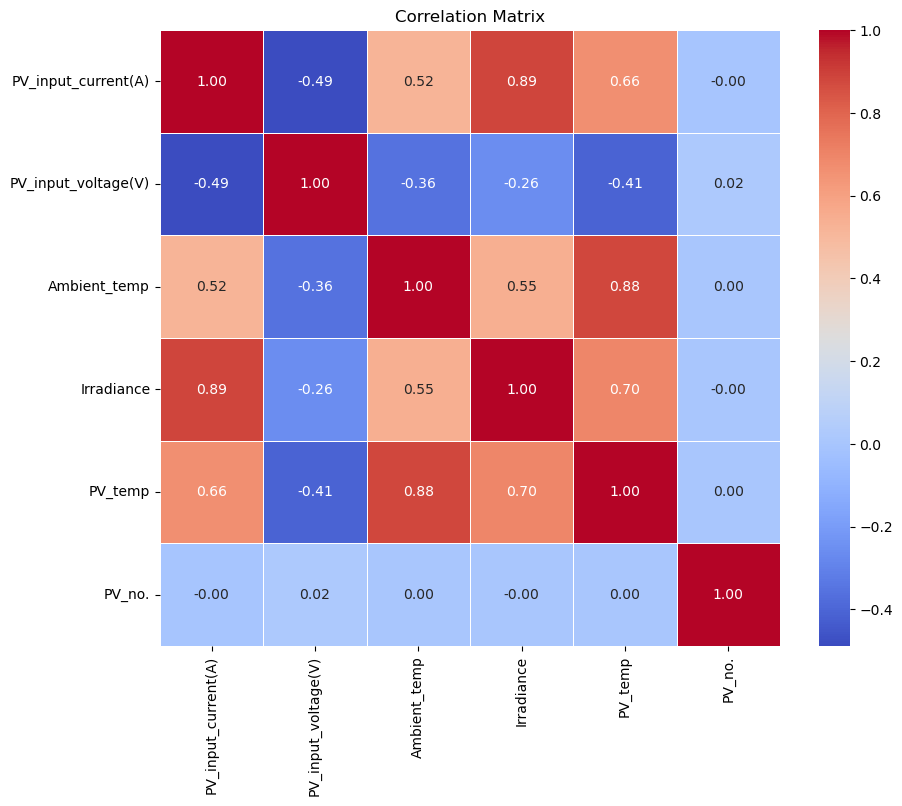

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ลบคอลัมน์ที่ไม่ใช่ตัวเลข (ถ้ามี)
df_numeric = df.select_dtypes(include=['number'])

# คำนวณ Correlation Matrix
correlation_matrix = df_numeric.corr()

# วาด Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# ตั้งชื่อ Title
plt.title("Correlation Matrix")

# แสดงผลลัพธ์
plt.show()

## คำนวณ Voltage

In [93]:
df['PV_input_voltage_cal(V)'] = np.where(
    df['Irradiance'] > 0,
    (20 * 38.9) * (1 - (-0.0029 * (df['PV_temp'] - 25))),
    0
)

## คำนวณ Amp

In [94]:
df['PV_input_current_cal(A)'] = np.where(
    df['Irradiance'] > 0,
     2*(df['Irradiance'] * (10.42 / 1000)) * (1 - (0.0005 * (df['PV_temp'] - 25))),
    0
)

In [95]:
df.describe()

,Time,PV_input_current(A),PV_input_voltage(V),Ambient_temp,Irradiance,PV_temp,PV_no.,PV_input_voltage_cal(V),PV_input_current_cal(A)
count,129360,129360.000000,129360.000000,129360.000000,129360.000000,129360.000000,129360.000000,129360.000000,129360.000000
mean,2021-07-16 10:48:09.308904960,4.056224,698.161840,33.055210,238.572325,37.553440,5.500000,806.323071,4.931946
min,2021-02-01 07:15:00,-0.800000,574.700000,18.700000,0.300000,17.600000,1.000000,761.304120,0.006225
25%,2021-04-23 13:41:15,1.610000,678.500000,30.100000,96.800000,32.100000,3.000000,794.019020,2.012042
50%,2021-07-06 16:22:30,3.470000,694.700000,33.100000,215.200000,37.500000,5.500000,806.202500,4.460705
75%,2021-10-10 07:48:45,6.310000,709.900000,35.800000,370.200000,42.900000,8.000000,818.385980,7.653578
max,2021-12-31 17:30:00,11.660000,890.200000,48.100000,732.300000,59.600000,10.000000,856.064520,15.134465
std,NaN,2.836273,34.364101,4.120687,163.054236,7.350711,2.872292,16.584675,3.361831


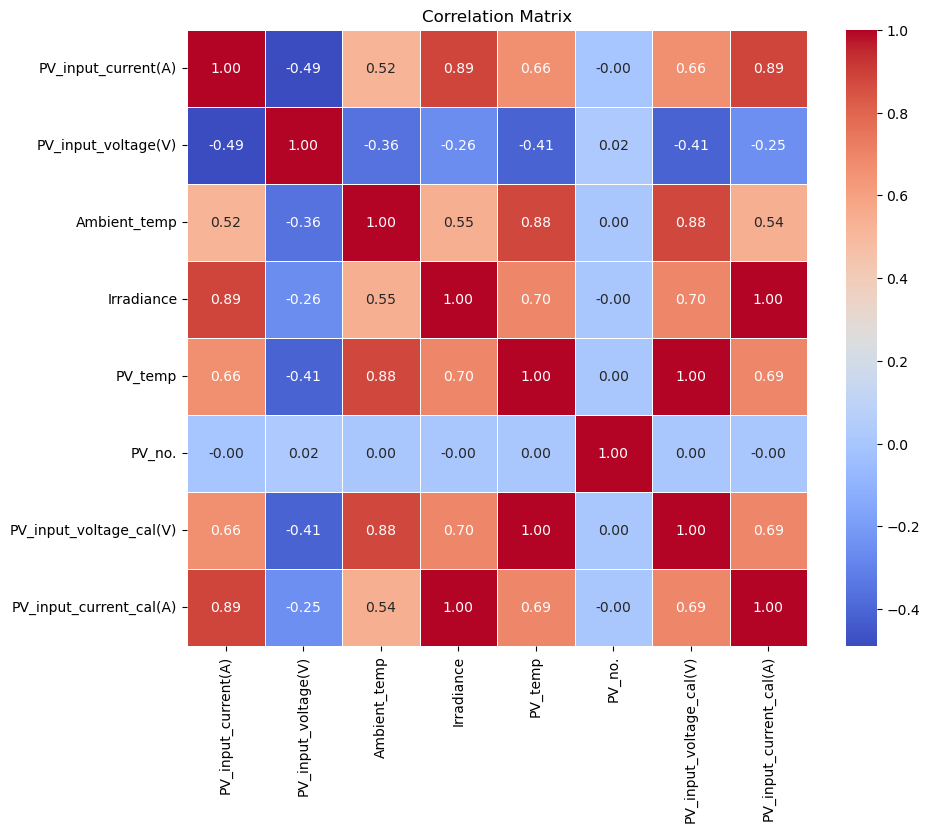

In [96]:
df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()

# วาด Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# ตั้งชื่อ Title
plt.title("Correlation Matrix")

# แสดงผลลัพธ์
plt.show()

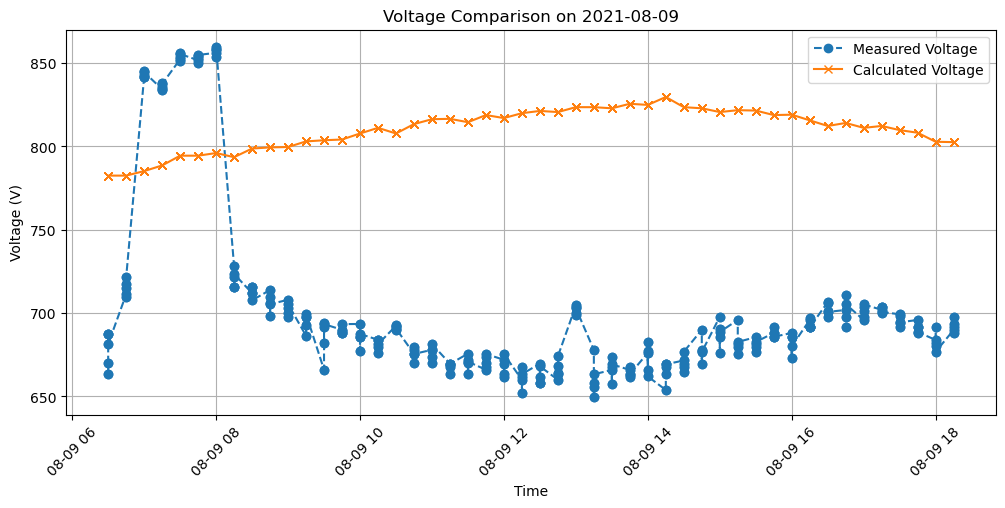

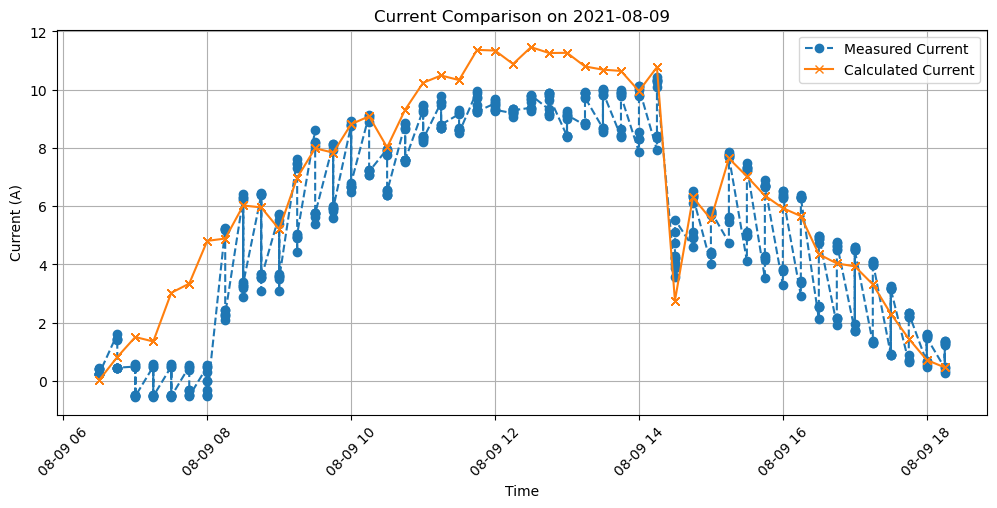

In [97]:
# แปลงคอลัมน์เวลาให้เป็น datetime
df['Time'] = pd.to_datetime(df['Time'])

# เลือกวันแบบสุ่มจากข้อมูล
random_day = np.random.choice(df['Time'].dt.date.unique())

# กรองข้อมูลเฉพาะวันนั้น
df_day = df[df['Time'].dt.date == random_day]

# พล็อตกราฟเปรียบเทียบค่าแรงดันไฟฟ้า
plt.figure(figsize=(12, 5))
plt.plot(df_day['Time'], df_day['PV_input_voltage(V)'], label="Measured Voltage", linestyle='dashed', marker='o')
plt.plot(df_day['Time'], df_day['PV_input_voltage_cal(V)'], label="Calculated Voltage", linestyle='solid', marker='x')
plt.xlabel("Time")
plt.ylabel("Voltage (V)")
plt.title(f"Voltage Comparison on {random_day}")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# พล็อตกราฟเปรียบเทียบค่ากระแสไฟฟ้า
plt.figure(figsize=(12, 5))
plt.plot(df_day['Time'], df_day['PV_input_current(A)'], label="Measured Current", linestyle='dashed', marker='o')
plt.plot(df_day['Time'], df_day['PV_input_current_cal(A)'], label="Calculated Current", linestyle='solid', marker='x')
plt.xlabel("Time")
plt.ylabel("Current (A)")
plt.title(f"Current Comparison on {random_day}")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


## Feauter Engineer

คอลัมน์หากแสงมีแต่solarcell ไม่ทำงาน

In [98]:
df['Irradiance>0,A.&V.=0'] = (df['Irradiance'] > 0) & (df['PV_input_current(A)'] == 0) & (df['PV_input_voltage(V)'] == 0)
 

In [99]:
df['Irradiance>0,A.&V.=0'].value_counts()

Irradiance>0,A.&V.=0
False    129360
Name: count, dtype: int64

การผลิตมีประสิทธิภาพน้อยกว่าที่คำนวน

In [100]:
cal_volt_threshold = df['PV_input_voltage_cal(V)'] * 0.80
df['voltcal_Anomal'] = (df['Irradiance'] > 0) & (df['PV_input_voltage(V)'] < cal_volt_threshold)
df['voltcal_Anomal'].value_counts()

voltcal_Anomal
False    118670
True      10690
Name: count, dtype: int64

In [101]:
cal_amp_threshold = df['PV_input_current_cal(A)'] * 0.80
df['amp_Anomal'] = (df['Irradiance'] > 0) & (df['PV_input_current(A)'] < cal_amp_threshold)
df['amp_Anomal'].value_counts()

amp_Anomal
False    90884
True     38476
Name: count, dtype: int64

In [102]:
df["Anomaly_Label"] = 0
df.loc[df["voltcal_Anomal"], "Anomaly_Label"] = 1
df.loc[df["amp_Anomal"], "Anomaly_Label"] = 2
df.loc[df["voltcal_Anomal"] & df["amp_Anomal"], "Anomaly_Label"] = 3


In [103]:
data_learn = df[['Time','PV_input_current(A)','PV_input_voltage(V)','Ambient_temp','Irradiance','PV_temp','PV_no.','Anomaly_Label']]
data_learn['Time'] = pd.to_datetime(data_learn['Time'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_11812\3576442029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_learn['Time'] = pd.to_datetime(data_learn['Time'])


ทำโมเดล

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Standardize column names (remove spaces and unify naming conventions)
data_learn.columns = data_learn.columns.str.strip().str.replace(" ", "_")

# Define features and labels
features = ["PV_input_current(A)", "PV_input_voltage(V)", "Ambient_temp", "Irradiance", "PV_temp", "PV_no."]
features = [col.replace(" ", "_") for col in features]  # Ensure matching feature names

X = data_learn[features]
y = data_learn["Anomaly_Label"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier for Multi-class classification
rf_multi_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_multi_class.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_multi_class.predict(X_test)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

In [105]:
report_df = pd.DataFrame(classification_rep).transpose()
report_df

,precision,recall,f1-score,support
0,0.994212,0.996397,0.995303,16377.000000
1,0.972452,0.987136,0.979739,1788.000000
2,0.992095,0.987787,0.989936,7369.000000
3,0.941368,0.855030,0.896124,338.000000
accuracy,0.991458,0.991458,0.991458,0.991458
macro avg,0.975032,0.956588,0.965276,25872.000000
weighted avg,0.991415,0.991458,0.991403,25872.000000


In [106]:
import pickle

# Assuming 'model' is your trained model
pickle_file = "randomfor.pkl"
with open(pickle_file, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {pickle_file}")

Model saved to randomfor.pkl


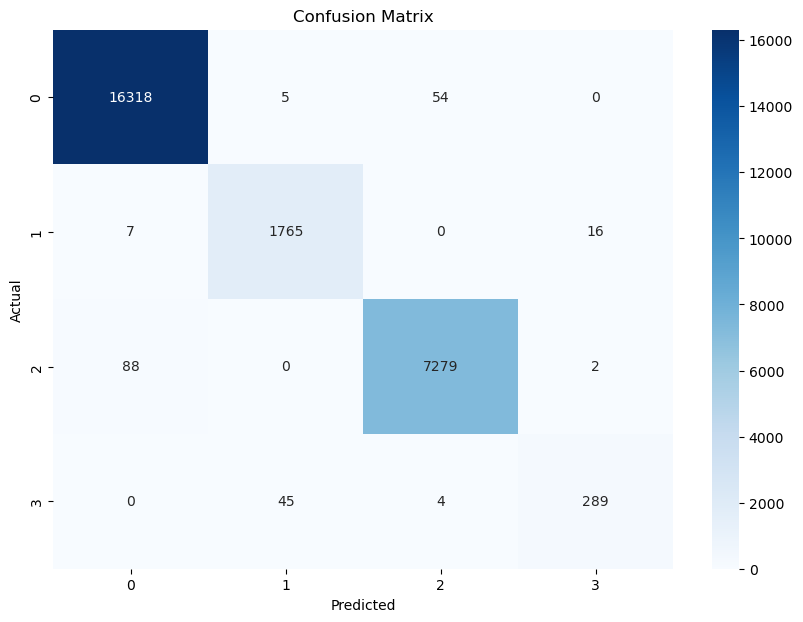

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# สร้าง Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# สร้างแผนภาพ Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [108]:
# คำนวณเปอร์เซ็นต์ Anomaly แยกตาม PV_no
anomaly_counts = data_learn.groupby("PV_no.")["Anomaly_Label"].value_counts()  # นับ anomaly แต่ละ PV_no
total_counts = data_learn["PV_no."].value_counts().sort_index()  # จำนวนข้อมูลทั้งหมดของแต่ละ PV_no
anomaly_total = data_learn[data_learn["Anomaly_Label"].isin([1, 2, 3])].groupby("PV_no.")["Anomaly_Label"].count()
# คำนวณเปอร์เซ็นต์
anomaly_percentage = (anomaly_total / total_counts) * 100

In [109]:
total_counts

PV_no.
1     12936
2     12936
3     12936
4     12936
5     12936
6     12936
7     12936
8     12936
9     12936
10    12936
Name: count, dtype: int64

In [110]:
anomaly_counts

PV_no.  Anomaly_Label
1       0                8698
        2                3126
        1                 806
        3                 306
2       0                7989
        2                3835
        1                 991
        3                 121
3       0                7931
        2                3903
        1                 998
        3                 104
4       0                7931
        2                3903
        1                 998
        3                 104
5       0                8706
        2                3124
        1                 814
        3                 292
6       0                7859
        2                3971
        1                 993
        3                 113
7       0                7874
        2                4024
        1                 824
        3                 214
8       0                8073
        2                3825
        1                 946
        3                  92
9       0         

In [111]:
anomaly_total

PV_no.
1     4238
2     4947
3     5005
4     5005
5     4230
6     5077
7     5062
8     4863
9     4151
10    4913
Name: Anomaly_Label, dtype: int64

In [112]:
anomaly_percentage = (anomaly_counts.div(total_counts, axis=0)) * 100

In [113]:
anomaly_percentage

PV_no.  Anomaly_Label
1       0                67.238714
        2                24.165121
        1                 6.230674
        3                 2.365492
2       0                61.757885
        2                29.645949
        1                 7.660792
        3                 0.935374
3       0                61.309524
        2                30.171614
        1                 7.714904
        3                 0.803958
4       0                61.309524
        2                30.171614
        1                 7.714904
        3                 0.803958
5       0                67.300557
        2                24.149660
        1                 6.292517
        3                 2.257267
6       0                60.752938
        2                30.697279
        1                 7.676252
        3                 0.873531
7       0                60.868893
        2                31.106988
        1                 6.369821
        3                 1.65429

In [114]:
# สร้างคอลัมน์ 'Hour' สำหรับแยกชั่วโมง
df['Hour'] = df['Time'].dt.floor('H')  # ปัดเวลาให้เหลือชั่วโมง (ไม่สนใจนาที)

# นับจำนวนชั่วโมงที่แต่ละ PV_no มีข้อมูล
working_hours = df.groupby("PV_no.")["Hour"].nunique().reset_index(name="Total_Working_Hours")


C:\Users\Acer\AppData\Local\Temp\ipykernel_11812\2747609689.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Hour'] = df['Time'].dt.floor('H')  # ปัดเวลาให้เหลือชั่วโมง (ไม่สนใจนาที)


In [115]:
working_hours

,PV_no.,Total_Working_Hours
0,1,3508
1,2,3508
2,3,3508
3,4,3508
4,5,3508
5,6,3508
6,7,3508
7,8,3508
8,9,3508
9,10,3508


In [116]:
data_learn['Date'] = data_learn['Time'].dt.date

C:\Users\Acer\AppData\Local\Temp\ipykernel_11812\98069996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_learn['Date'] = data_learn['Time'].dt.date


In [117]:
data_learn

,Time,PV_input_current(A),PV_input_voltage(V),Ambient_temp,Irradiance,PV_temp,PV_no.,Anomaly_Label,Date
0,2021-02-01 07:15:00,0.41,711.3,23.5,6.4,22.8,1,0,2021-02-01
1,2021-02-01 07:15:00,0.22,711.3,23.5,6.4,22.8,2,0,2021-02-01
2,2021-02-01 07:15:00,0.23,717.6,23.5,6.4,22.8,3,0,2021-02-01
3,2021-02-01 07:15:00,0.23,717.6,23.5,6.4,22.8,4,0,2021-02-01
4,2021-02-01 07:15:00,0.41,704.3,23.5,6.4,22.8,5,0,2021-02-01
...,...,...,...,...,...,...,...,...,...
129355,2021-12-31 17:30:00,0.75,690.2,29.5,11.9,29.1,6,0,2021-12-31
129356,2021-12-31 17:30:00,-0.06,706.2,29.5,11.9,29.1,7,2,2021-12-31
129357,2021-12-31 17:30:00,0.78,706.2,29.5,11.9,29.1,8,0,2021-12-31
129358,2021-12-31 17:30:00,0.26,701.6,29.5,11.9,29.1,9,0,2021-12-31


In [118]:
max_pv_temp_per_day = data_learn.groupby(['Date', 'PV_no.'])['PV_temp'].max().reset_index()
average_max_pv_temp = max_pv_temp_per_day.groupby('PV_no.')['PV_temp'].mean()

In [119]:
max_pv_temp_per_day.max()

Date       2021-12-31
PV_no.             10
PV_temp          59.6
dtype: object

In [120]:
average_max_pv_temp

PV_no.
1     47.857878
2     47.857878
3     47.857878
4     47.857878
5     47.857878
6     47.857878
7     47.857878
8     47.857878
9     47.857878
10    47.857878
Name: PV_temp, dtype: float64

In [126]:
df

,Time,PV_input_current(A),PV_input_voltage(V),Ambient_temp,Irradiance,PV_temp,PV_no.,PV_input_voltage_cal(V),PV_input_current_cal(A),"Irradiance>0,A.&V.=0",voltcal_Anomal,amp_Anomal,Anomaly_Label,Hour
0,2021-02-01 07:15:00,0.41,711.3,23.5,6.4,22.8,1,773.03636,0.133523,False,False,False,0,2021-02-01 07:00:00
1,2021-02-01 07:15:00,0.22,711.3,23.5,6.4,22.8,2,773.03636,0.133523,False,False,False,0,2021-02-01 07:00:00
2,2021-02-01 07:15:00,0.23,717.6,23.5,6.4,22.8,3,773.03636,0.133523,False,False,False,0,2021-02-01 07:00:00
3,2021-02-01 07:15:00,0.23,717.6,23.5,6.4,22.8,4,773.03636,0.133523,False,False,False,0,2021-02-01 07:00:00
4,2021-02-01 07:15:00,0.41,704.3,23.5,6.4,22.8,5,773.03636,0.133523,False,False,False,0,2021-02-01 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129355,2021-12-31 17:30:00,0.75,690.2,29.5,11.9,29.1,6,787.25042,0.247488,False,False,False,0,2021-12-31 17:00:00
129356,2021-12-31 17:30:00,-0.06,706.2,29.5,11.9,29.1,7,787.25042,0.247488,False,False,True,2,2021-12-31 17:00:00
129357,2021-12-31 17:30:00,0.78,706.2,29.5,11.9,29.1,8,787.25042,0.247488,False,False,False,0,2021-12-31 17:00:00
129358,2021-12-31 17:30:00,0.26,701.6,29.5,11.9,29.1,9,787.25042,0.247488,False,False,False,0,2021-12-31 17:00:00


เจาะหาความผิดปกติรายวัน

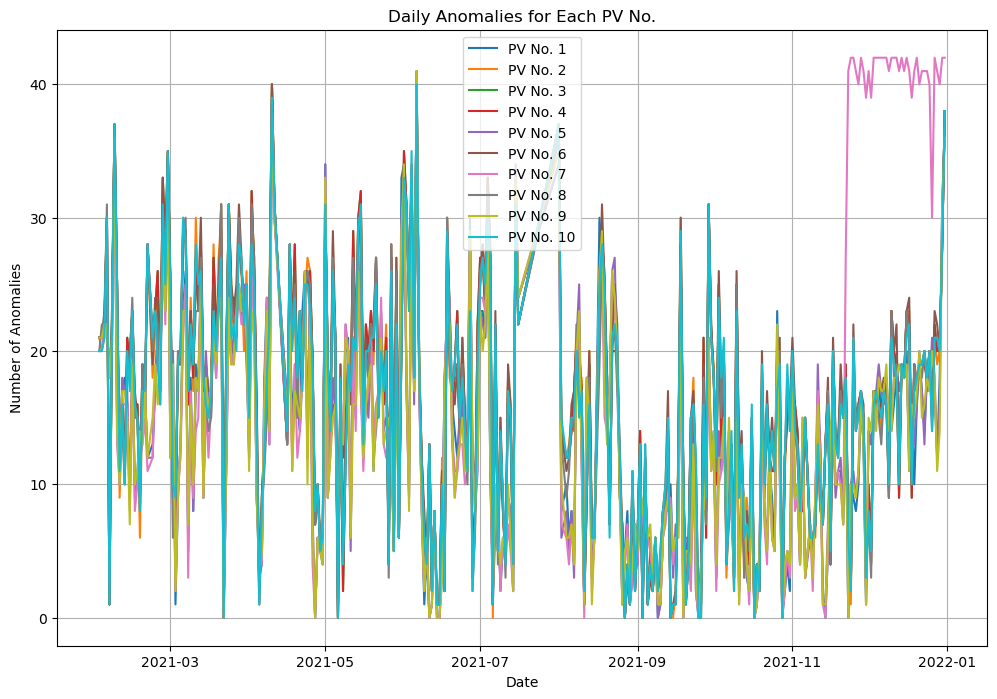

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# คำนวณจำนวน Anomalies ต่อวันสำหรับแต่ละ PV_no.
daily_anomalies = data_learn.groupby(['Date', 'PV_no.'])['Anomaly_Label'].apply(lambda x: x.isin([1, 2, 3]).sum()).reset_index()

# สร้างแผนภาพ
plt.figure(figsize=(12, 8))

# วาดเส้นกราฟแยกตาม PV No.
for pv_no in daily_anomalies['PV_no.'].unique():
    pv_data = daily_anomalies[daily_anomalies['PV_no.'] == pv_no]
    plt.plot(pv_data['Date'], pv_data['Anomaly_Label'], label=f'PV No. {pv_no}')

# ตั้งค่าชื่อแกนและหัวข้อแผนภาพ
plt.xlabel('Date')
plt.ylabel('Number of Anomalies')
plt.title('Daily Anomalies for Each PV No.')

# แสดง Legend และเส้นกริด
plt.legend()
plt.grid(True)

# แสดงกราฟ
plt.show()

### เตรียมข้อมูลผิดปกติรายวันไปทำนายอนาคต

In [ ]:
daily_avg_params = data_learn.groupby("Date").agg({
    "PV_input_voltage(V)": "mean",
    "PV_input_current(A)": "mean",
    "Ambient_temp": "mean",
    "Irradiance": "mean",
    "PV_temp": "mean"
}).reset_index()

# ตรวจสอบข้อมูล
print(daily_avg_params.head())


         Date  PV_input_voltage(V)  PV_input_current(A)  Ambient_temp  \
0  2021-02-01           696.981905             3.962738     35.223810   
1  2021-02-02           697.272558             4.261465     36.130233   
2  2021-02-03           704.301395             4.162791     35.146512   
3  2021-02-04           733.535814             3.719837     32.520930   
4  2021-02-05           695.329474             3.955842     36.568421   

   Irradiance    PV_temp  
0  249.026190  38.007143  
1  269.437209  38.137209  
2  264.125581  36.016279  
3  263.588372  34.032558  
4  253.200000  41.205263  


In [ ]:
# รวมข้อมูล daily_anomalies กับพารามิเตอร์รายวัน
df_predic = daily_anomalies.merge(daily_avg_params, on="Date", how="left")

# ตรวจสอบข้อมูล
df_predic.head()


,Date,PV_no.,Anomaly_Label,PV_input_voltage(V),PV_input_current(A),Ambient_temp,Irradiance,PV_temp
0,2021-02-01,1,21,696.981905,3.962738,35.22381,249.02619,38.007143
1,2021-02-01,2,21,696.981905,3.962738,35.22381,249.02619,38.007143
2,2021-02-01,3,21,696.981905,3.962738,35.22381,249.02619,38.007143
3,2021-02-01,4,21,696.981905,3.962738,35.22381,249.02619,38.007143
4,2021-02-01,5,21,696.981905,3.962738,35.22381,249.02619,38.007143


## สรุปข้อมูลวันที่ผิดปกติ

In [ ]:
# 1. หาค่า Anomaly_Label สูงสุด
max_anomaly_label = daily_anomalies['Anomaly_Label'].max()

# 2. ดึงข้อมูลของแถวที่มี Anomaly_Label สูงสุด
max_anomaly_data = daily_anomalies[daily_anomalies['Anomaly_Label'] == max_anomaly_label]

# 3. ดึงค่า PV_no. และ Date ที่เกี่ยวข้อง
pv_maxanomaly = max_anomaly_data['PV_no.'].tolist()  # ถ้ามีหลายค่าให้ใช้ list
max_anomaly_date = max_anomaly_data['Date'].iloc[0]  # ใช้แค่ค่าวันที่แรก

# 4. กรองข้อมูลจาก data_learn ที่มีวันที่ตรงกับ max_anomaly_date และ PV_no. ที่ดึงมา
filtered_data = data_learn[(data_learn['Date'] == max_anomaly_date) & (data_learn['PV_no.'].isin(pv_maxanomaly))]


# แสดงค่าใน console (ถ้าต้องการตรวจสอบ)
print("Max Anomaly Label:", max_anomaly_label)
print("Corresponding PV_no.:", pv_maxanomaly)
print("Max Anomaly Date:", max_anomaly_date)

Max Anomaly Label: 42
Corresponding PV_no.: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Max Anomaly Date: 2021-11-24


In [ ]:
filtered_data.head()

,Time,PV_input_current(A),PV_input_voltage(V),Ambient_temp,Irradiance,PV_temp,PV_no.,Anomaly_Label,Date
113816,2021-11-24 07:00:00,-0.05,697.4,24.6,17.3,23.9,7,2,2021-11-24
113826,2021-11-24 07:15:00,-0.05,697.4,24.5,16.8,24.0,7,2,2021-11-24
113836,2021-11-24 07:30:00,-0.05,703.4,24.7,17.3,24.3,7,2,2021-11-24
113846,2021-11-24 07:45:00,-0.05,703.4,24.8,18.6,24.3,7,2,2021-11-24
113856,2021-11-24 08:00:00,-0.05,715.4,25.0,35.0,25.1,7,2,2021-11-24


In [ ]:
anomaly_counts = filtered_data.groupby("PV_no.")["Anomaly_Label"].value_counts()  # นับ anomaly แต่ละ PV_no
total_counts = filtered_data["PV_no."].value_counts().sort_index()  # จำนวนข้อมูลทั้งหมดของแต่ละ PV_no
anomaly_total = filtered_data[filtered_data["Anomaly_Label"].isin([1, 2, 3])].groupby("PV_no.")["Anomaly_Label"].count()

In [ ]:
anomaly_total

PV_no.
7    42
Name: Anomaly_Label, dtype: int64

In [ ]:
anomaly_percentage = (anomaly_counts.div(total_counts, axis=0)) * 100

In [ ]:
anomaly_percentage

PV_no.  Anomaly_Label
7       2                100.0
Name: count, dtype: float64

ถ้าanomaly ส่วนใหญ่เป็น 1 จะplot แรงดัน

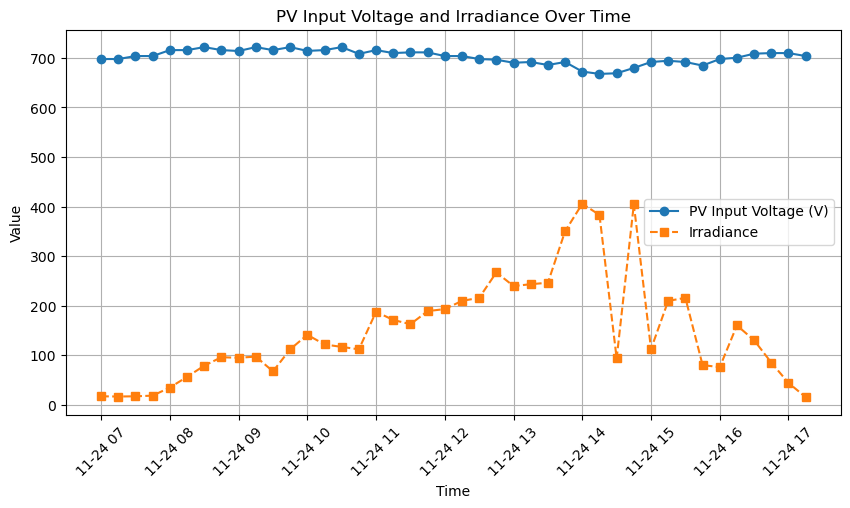

In [ ]:
# Plot แรงดันไฟฟ้าเทียบกับแสงตามเวลา
plt.figure(figsize=(10, 5))
plt.plot(filtered_data["Time"], filtered_data["PV_input_voltage(V)"], marker='o', linestyle='-', label="PV Input Voltage (V)")
plt.plot(filtered_data["Time"], filtered_data["Irradiance"], marker='s', linestyle='--', label="Irradiance")

# ปรับแต่งกราฟ
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("PV Input Voltage and Irradiance Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# แสดงผล
plt.show()

ถ้า anomaly ส่วนใหญ่เป็น 2 จะplot กระแสไฟฟ้า

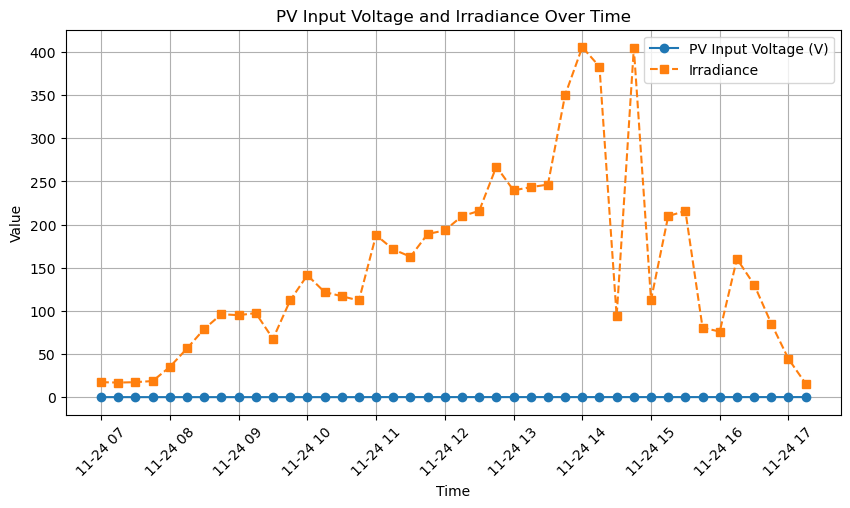

In [ ]:
# Plot แรงดันไฟฟ้าเทียบกับแสงตามเวลา
plt.figure(figsize=(10, 5))
plt.plot(filtered_data["Time"], filtered_data["PV_input_current(A)"], marker='o', linestyle='-', label="PV Input Voltage (V)")
plt.plot(filtered_data["Time"], filtered_data["Irradiance"], marker='s', linestyle='--', label="Irradiance")

# ปรับแต่งกราฟ
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("PV Input Voltage and Irradiance Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# แสดงผล
plt.show()